In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import os 

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = os.path.join("output_data","cities.csv")

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

604

## Perform API Calls
    Perform a weather check on each city using a series of successive API calls.
    Include a print log of each city as it'sbeing processed (with the city number and city name).

In [3]:
## Create dataframe of cities in list with empty columns for data
df=pd.DataFrame(cities)
df=df.rename(columns={0:'City'})
df['Cloudiness']=''
df['Country']=''
df['Date']=''
df['Humidity']=''
df['Lat']=''
df['Lng']=''
df['Max Temp']=''
df['Wind Speed']=''
print(df.shape)
df.head()

(604, 9)


,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,busselton,,,,,,,,
1,atlantic city,,,,,,,,
2,nikolskoye,,,,,,,,
3,turukhansk,,,,,,,,
4,ilulissat,,,,,,,,


In [4]:
## create base url and parameters
base_url="http://api.openweathermap.org/data/2.5/weather?"
params={"units":"imperial",
       "APPID":api_key}

In [5]:
count=1

for index, row in df.iterrows():
    
    # get city from dataframe
    city_name=row['City']
    
    # add new key to params for query search by city name
    params['q']=city_name
    
    # assemble url and make api request
    response=requests.get(base_url,params=params).json()
    
    try:
        print(f'Processing Record {count}: {city_name}')
    
        df.loc[index, 'Cloudiness']=response['clouds']['all']
        df.loc[index, 'Country']=response['sys']['country']
        df.loc[index, 'Date']=response['dt']
        df.loc[index,'Humidity']=response['main']['humidity']
        df.loc[index,'Lat']=response['coord']['lat']
        df.loc[index,'Lng']=response['coord']['lon']
        df.loc[index,'Max Temp']=response['main']['temp_max']
        df.loc[index,'Wind Speed']=response['wind']['speed']
    except(KeyError):
        print("Missing field/result...skipping")
    
    count=count+1


Processing Record 1: busselton
Processing Record 2: atlantic city
Missing field/result...skipping
Processing Record 3: nikolskoye
Processing Record 4: turukhansk
Processing Record 5: ilulissat
Processing Record 6: bluff
Processing Record 7: chuy
Processing Record 8: salalah
Processing Record 9: sao jose da coroa grande
Processing Record 10: svetlyy
Missing field/result...skipping
Processing Record 11: vaini
Processing Record 12: yellowknife
Processing Record 13: puerto narino
Processing Record 14: ushuaia
Processing Record 15: berberati
Processing Record 16: duncan
Processing Record 17: coihaique
Processing Record 18: fort walton beach
Processing Record 19: illoqqortoormiut
Missing field/result...skipping
Processing Record 20: leningradskiy
Processing Record 21: atuona
Processing Record 22: new norfolk
Processing Record 23: labuhan
Processing Record 24: saint-philippe
Processing Record 25: umm durman
Missing field/result...skipping
Processing Record 26: thompson
Processing Record 27: n

Processing Record 231: hovd
Processing Record 232: iralaya
Processing Record 233: kaitangata
Processing Record 234: montrose
Processing Record 235: makakilo city
Processing Record 236: verkhoyansk
Processing Record 237: kargat
Processing Record 238: kletnya
Processing Record 239: salinas
Processing Record 240: cullman
Processing Record 241: roma
Processing Record 242: pocri
Processing Record 243: cherskiy
Processing Record 244: jiaohe
Processing Record 245: dunedin
Processing Record 246: sabha
Processing Record 247: barra do garcas
Processing Record 248: norwich
Processing Record 249: shirokiy
Processing Record 250: paciran
Processing Record 251: xam nua
Processing Record 252: prince rupert
Processing Record 253: boende
Processing Record 254: doha
Processing Record 255: touros
Processing Record 256: buriti alegre
Processing Record 257: porto velho
Processing Record 258: la ronge
Processing Record 259: mecca
Processing Record 260: bandarbeyla
Processing Record 261: bonthe
Processing Rec

Processing Record 468: kamenskoye
Missing field/result...skipping
Processing Record 469: lata
Processing Record 470: les cayes
Processing Record 471: saint-francois
Processing Record 472: mikuni
Processing Record 473: clarence town
Processing Record 474: kango
Processing Record 475: yendi
Processing Record 476: mocuba
Processing Record 477: sampit
Processing Record 478: cozumel
Missing field/result...skipping
Processing Record 479: calama
Processing Record 480: hirado
Processing Record 481: morehead
Processing Record 482: pilar do sul
Processing Record 483: itoigawa
Processing Record 484: krasnoselkup
Missing field/result...skipping
Processing Record 485: fort-shevchenko
Processing Record 486: taonan
Processing Record 487: alofi
Processing Record 488: waipawa
Processing Record 489: rio grande
Processing Record 490: vanimo
Processing Record 491: kwakoa
Processing Record 492: salta
Processing Record 493: volodarka
Processing Record 494: aitape
Processing Record 495: katangli
Processing R

## Convert Raw Data into Dataframe
    Export the city data into a .csv.
    Display the DataFrame

In [6]:
df.to_csv(output_data_file,header=True)

In [7]:
print(df.count())
df.head()

City          604
Cloudiness    604
Country       604
Date          604
Humidity      604
Lat           604
Lng           604
Max Temp      604
Wind Speed    604
dtype: int64


,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,busselton,100,AU,1573848697,38,-33.64,115.35,64,14.43
1,atlantic city,,,,,,,,
2,nikolskoye,40,RU,1573848713,94,59.7,30.79,37,4.85
3,turukhansk,92,RU,1573848904,93,65.8,87.96,-17.52,3.87
4,ilulissat,75,GL,1573848750,92,69.22,-51.1,28.4,9.17


In [8]:
## investigate the data collected.
## see how many cities are missing the field results we are interested in plotting and identify those cities

missing_data_cities=[]
for index, row in df.iterrows():
    if row['Max Temp'] == '' or row['Humidity']== '' or row['Cloudiness']=='' or row['Wind Speed']== '':
        missing_data_cities.append(row['City'])
#         print(index, row)

print(len(missing_data_cities))
print(missing_data_cities)

53
['atlantic city', 'svetlyy', 'illoqqortoormiut', 'umm durman', 'samusu', 'satitoa', 'tsihombe', 'vaitupu', 'mys shmidta', 'asfi', 'gorno-chuyskiy', 'tumannyy', 'bengkulu', 'nizhneyansk', 'tokzar', 'taolanaro', 'palabuhanratu', 'cagayan de tawi-tawi', 'kusti', 'keshan', 'belushya guba', 'bolungarvik', 'saleaula', 'amderma', 'rungata', 'barentsburg', 'hihifo', 'korla', 'warqla', 'ngukurr', 'attawapiskat', 'naftah', 'waw', 'bardiyah', 'kuche', 'sentyabrskiy', 'tabialan', 'yambio', 'tatawin', 'skagastrond', 'barawe', 'abomsa', 'kamenskoye', 'cozumel', 'krasnoselkup', 'sinkat', 'kadykchan', 'tidore', 'umzimvubu', 'lolua', 'dzhusaly', 'jibuti', 'stoyba']


In [9]:
## drop the rows in the dataframe that have missing data fields we are interested in plotting
## use the list of cities missing data to gather a list of their indexs and then drop those rows
row_drops=[]

for i in missing_data_cities:
    row_d=df[df['City']==i].index
    row_drops.append(row_d)
# print(row_drops)

new_df=df.drop(df.index[row_drops])
print(new_df.count())
new_df.head()

City          551
Cloudiness    551
Country       551
Date          551
Humidity      551
Lat           551
Lng           551
Max Temp      551
Wind Speed    551
dtype: int64


,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,busselton,100,AU,1573848697,38,-33.64,115.35,64,14.43
2,nikolskoye,40,RU,1573848713,94,59.7,30.79,37,4.85
3,turukhansk,92,RU,1573848904,93,65.8,87.96,-17.52,3.87
4,ilulissat,75,GL,1573848750,92,69.22,-51.1,28.4,9.17
5,bluff,0,AU,1573848711,71,-23.58,149.07,73.71,6.89


In [10]:
## storing date of data pull from dataframe in variable to use when plotting data
data_pull_date=time.localtime(new_df['Date'][0])
print(data_pull_date)
data_date=f'{data_pull_date[1]}/{data_pull_date[2]}/{data_pull_date[0]}'
print(data_date)

time.struct_time(tm_year=2019, tm_mon=11, tm_mday=15, tm_hour=14, tm_min=11, tm_sec=37, tm_wday=4, tm_yday=319, tm_isdst=0)
11/15/2019


## Plotting the Data
    Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
    Save the plotted figures as .pngs.

#### Latitude vs. Max Temp

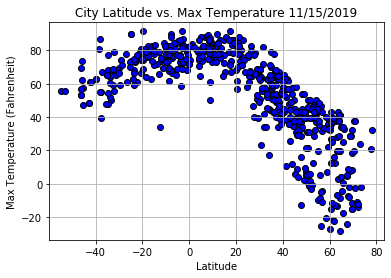

In [11]:
x_axis=new_df['Lat']
temp_data=new_df['Max Temp']

plt.scatter(x=x_axis, y=temp_data, marker='o', facecolor='blue', edgecolors='black')
plt.xlim(min(new_df['Lat'])-5,max(new_df['Lat'])+5)
plt.ylim(min(new_df['Max Temp'])-5,max(new_df['Max Temp'])+5)
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (Fahrenheit)")
plt.title(f"City Latitude vs. Max Temperature {data_date}")
plt.grid()
plt.savefig('output_data/LatVsTemp.png')
plt.show()

#### Latitude vs. Humidity

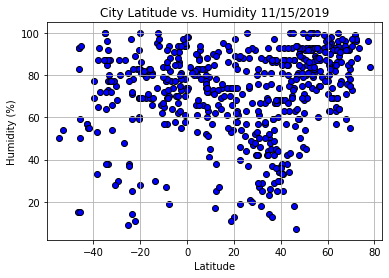

In [12]:
hum_data=new_df['Humidity']

plt.scatter(x=x_axis, y=hum_data, marker='o', facecolor='blue', edgecolors='black')
plt.xlim(min(new_df['Lat'])-5,max(new_df['Lat'])+5)
plt.ylim(min(new_df['Humidity'])-5,max(new_df['Humidity'])+5)
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title(f"City Latitude vs. Humidity {data_date}")
plt.grid()
plt.savefig('output_data/LatVsHum.png')
plt.show()

#### Latitude vs. Cloudiness

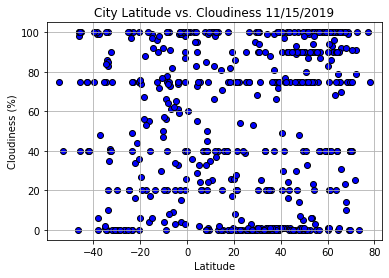

In [13]:
cld_data=new_df['Cloudiness']

plt.scatter(x=x_axis, y=cld_data, marker='o', facecolor='blue', edgecolors='black')
plt.xlim(min(new_df['Lat'])-5,max(new_df['Lat'])+5)
plt.ylim(min(new_df['Cloudiness'])-5,max(new_df['Cloudiness'])+5)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title(f"City Latitude vs. Cloudiness {data_date}")
plt.grid()
plt.savefig('output_data/LatVsClouds.png')
plt.show()

#### Latitude vs. Wind Speed

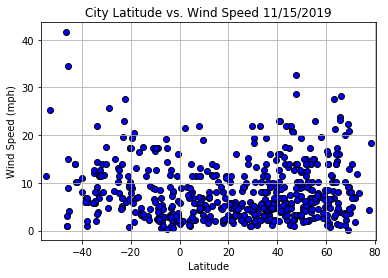

In [14]:
wsp_data=new_df['Wind Speed']

plt.scatter(x=x_axis, y=wsp_data, marker='o', facecolor='blue', edgecolors='black')
plt.xlim(min(new_df['Lat'])-2,max(new_df['Lat'])+2)
plt.ylim(min(new_df['Wind Speed'])-2,max(new_df['Wind Speed'])+2)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title(f"City Latitude vs. Wind Speed {data_date}")
plt.grid()
plt.savefig('output_data/LatVsWind.png')
plt.show()

In [15]:
new_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,busselton,100,AU,1573848697,38,-33.64,115.35,64,14.43
2,nikolskoye,40,RU,1573848713,94,59.7,30.79,37,4.85
3,turukhansk,92,RU,1573848904,93,65.8,87.96,-17.52,3.87
4,ilulissat,75,GL,1573848750,92,69.22,-51.1,28.4,9.17
5,bluff,0,AU,1573848711,71,-23.58,149.07,73.71,6.89


In [16]:
## binning data to further investigate results by latitude ranges
bins=[-90,-45,0,45,90]
bin_name=['far_west','west','east','far_east']
new_df['Lat_Ranges']=pd.cut(new_df['Lat'],bins,labels=bin_name)
new_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed,Lat_Ranges
0,busselton,100,AU,1573848697,38,-33.64,115.35,64,14.43,west
2,nikolskoye,40,RU,1573848713,94,59.7,30.79,37,4.85,far_east
3,turukhansk,92,RU,1573848904,93,65.8,87.96,-17.52,3.87,far_east
4,ilulissat,75,GL,1573848750,92,69.22,-51.1,28.4,9.17,far_east
5,bluff,0,AU,1573848711,71,-23.58,149.07,73.71,6.89,west


In [17]:
group_df=new_df.groupby(['Lat_Ranges'])
group_df['City'].count()

Lat_Ranges
far_west     10
west        150
east        227
far_east    164
Name: City, dtype: int64

In [18]:
new_df['Max Temp']=pd.to_numeric(df['Max Temp'])
group_df=new_df.groupby(['Lat_Ranges'])
group_df['Max Temp'].mean()

Lat_Ranges
far_west    58.321000
west        71.984933
east        64.965727
far_east    21.197378
Name: Max Temp, dtype: float64

In [19]:
new_df['Humidity']=pd.to_numeric(df['Humidity'])
group_df=new_df.groupby(['Lat_Ranges'])
group_df['Humidity'].mean()

Lat_Ranges
far_west    60.600000
west        72.286667
east        64.158590
far_east    81.707317
Name: Humidity, dtype: float64

In [20]:
new_df['Cloudiness']=pd.to_numeric(df['Cloudiness'])
group_df=new_df.groupby(['Lat_Ranges'])
group_df['Cloudiness'].mean()

Lat_Ranges
far_west    72.800000
west        54.046667
east        41.991189
far_east    63.731707
Name: Cloudiness, dtype: float64

In [21]:
new_df['Wind Speed']=pd.to_numeric(df['Wind Speed'])
group_df=new_df.groupby(['Lat_Ranges'])
group_df['Wind Speed'].mean()

Lat_Ranges
far_west    14.595000
west         8.344267
east         7.106211
far_east     9.371402
Name: Wind Speed, dtype: float64

## My Observations:

- Based on the City Latitude vs. Max Temperature (fahrenheit) data results, it appears that cities with latitudes West of the equator (latitude is 0 to -90) have higher max temperatures than cities with latitudes east of the equator (latitude is 0 to 90). 
- Based on the City Latitude vs. Humidity (%) data results, it appears that cities to the far East of the equator (latitude is 45 to 90) tend to have higher humidity percentages. 
- Based on the City Latitude vs. Cloudiness (%) data results, it appears that cities closer to the equator on both the East and the West (latitude is somewhere between -45 and 45) have lower percentages of clouds. Cities further from the equator (latitude is ether -90 to -45 (West) or 45 to 90 (East)) tend to have higher percentages of clouds than those closer to the equator. 
